# IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# IMPORTING DATASET

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# DATA CLEANING

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.drop(columns=['who','adult_male','deck','embark_town','alive','pclass'],inplace=True)

In [6]:
titanic

,survived,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,male,22.0,1,0,7.2500,S,Third,False
1,1,female,38.0,1,0,71.2833,C,First,False
2,1,female,26.0,0,0,7.9250,S,Third,True
3,1,female,35.0,1,0,53.1000,S,First,False
4,0,male,35.0,0,0,8.0500,S,Third,True
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,True
887,1,female,19.0,0,0,30.0000,S,First,True
888,0,female,NaN,1,2,23.4500,S,Third,False
889,1,male,26.0,0,0,30.0000,C,First,True


In [7]:
titanic.replace({'male': '1', 'female': 2, 'First': 1,'Second': '2', 'Third': 3, 'S':3,'C':1,'Q':2},inplace=True)
titanic

,survived,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,1,22.0,1,0,7.2500,3.0,3,False
1,1,2,38.0,1,0,71.2833,1.0,1,False
2,1,2,26.0,0,0,7.9250,3.0,3,True
3,1,2,35.0,1,0,53.1000,3.0,1,False
4,0,1,35.0,0,0,8.0500,3.0,3,True
...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,3.0,2,True
887,1,2,19.0,0,0,30.0000,3.0,1,True
888,0,2,NaN,1,2,23.4500,3.0,3,False
889,1,1,26.0,0,0,30.0000,1.0,1,True


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
titanic['alone']=le.fit_transform(titanic['alone'])
titanic

,survived,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,1,22.0,1,0,7.2500,3.0,3,0
1,1,2,38.0,1,0,71.2833,1.0,1,0
2,1,2,26.0,0,0,7.9250,3.0,3,1
3,1,2,35.0,1,0,53.1000,3.0,1,0
4,0,1,35.0,0,0,8.0500,3.0,3,1
...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,3.0,2,1
887,1,2,19.0,0,0,30.0000,3.0,1,1
888,0,2,NaN,1,2,23.4500,3.0,3,0
889,1,1,26.0,0,0,30.0000,1.0,1,1


In [10]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [11]:
a=titanic.groupby(['sex']).age.mean()
b=a.to_frame()
b.rename(columns={"age":"Age"},inplace=True)
b

,Age
sex,
2,27.915709
1,30.726645


In [12]:
titanic1=pd.merge(titanic,b,on='sex')
titanic1["age"]=titanic1["age"].mask(pd.isnull, titanic1["Age"])
titanic1

,survived,sex,age,sibsp,parch,fare,embarked,class,alone,Age
0,0,1,22.000000,1,0,7.2500,3.0,3,0,30.726645
1,0,1,35.000000,0,0,8.0500,3.0,3,1,30.726645
2,0,1,30.726645,0,0,8.4583,2.0,3,1,30.726645
3,0,1,54.000000,0,0,51.8625,3.0,1,1,30.726645
4,0,1,2.000000,3,1,21.0750,3.0,3,0,30.726645
...,...,...,...,...,...,...,...,...,...,...
886,1,2,25.000000,0,1,26.0000,3.0,2,0,27.915709
887,0,2,22.000000,0,0,10.5167,3.0,3,1,27.915709
888,0,2,39.000000,0,5,29.1250,2.0,3,0,27.915709
889,1,2,19.000000,0,0,30.0000,3.0,1,1,27.915709


In [13]:
titanic1['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [14]:
titanic1['embarked'].value_counts()

3.0    644
1.0    168
2.0     77
Name: embarked, dtype: int64

In [15]:
common_value='3.0'
titanic1['embarked'].fillna(common_value,inplace=True)

In [16]:
titanic1.drop(columns=['Age'],inplace=True)

In [17]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
survived    891 non-null int64
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    891 non-null object
class       891 non-null object
alone       891 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [18]:
titanic1

,survived,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,1,22.000000,1,0,7.2500,3,3,0
1,0,1,35.000000,0,0,8.0500,3,3,1
2,0,1,30.726645,0,0,8.4583,2,3,1
3,0,1,54.000000,0,0,51.8625,3,1,1
4,0,1,2.000000,3,1,21.0750,3,3,0
...,...,...,...,...,...,...,...,...,...
886,1,2,25.000000,0,1,26.0000,3,2,0
887,0,2,22.000000,0,0,10.5167,3,3,1
888,0,2,39.000000,0,5,29.1250,2,3,0
889,1,2,19.000000,0,0,30.0000,3,1,1


# DATA VISUALIZATION

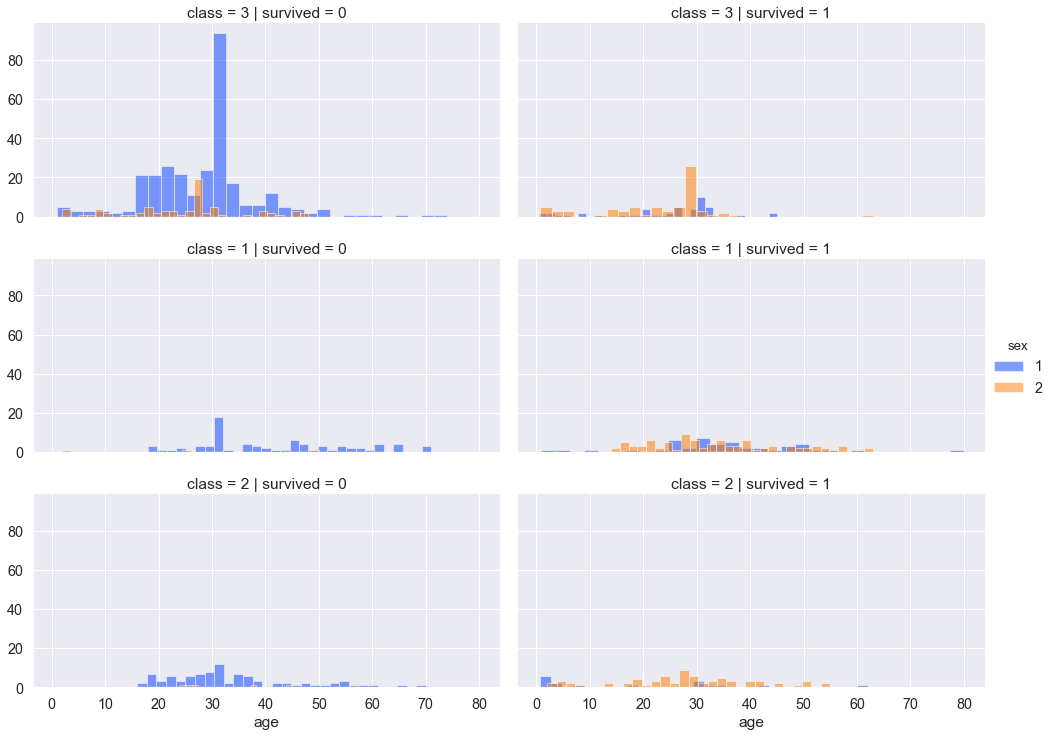

In [19]:
sns.set(font_scale=1.3)
grid = sns.FacetGrid(data=titanic1, col='survived', row='class', height=3.5, hue='sex',aspect=2,palette='bright')
grid.map(plt.hist, 'age', bins=30,alpha=.5)
grid.add_legend()

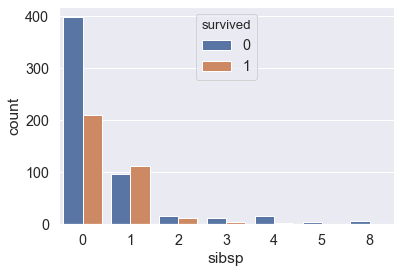

In [20]:
sns.countplot(x='sibsp', data=titanic1, hue='survived')

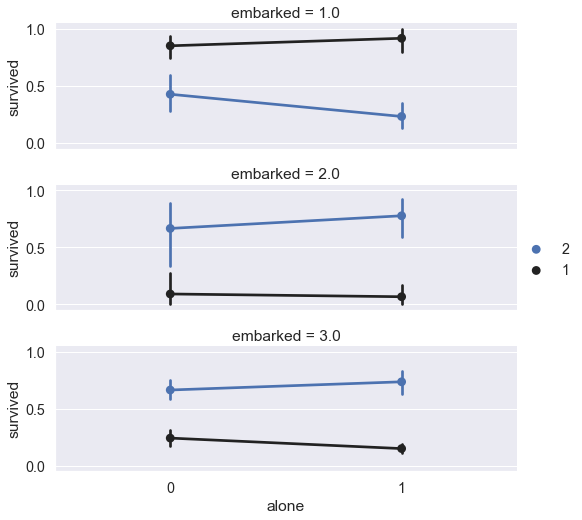

In [21]:
f=sns.FacetGrid(titanic,row='embarked',height=2.5,aspect=3)
f.map(sns.pointplot,'alone','survived','sex',order=None,hue_order=None)
f.add_legend()

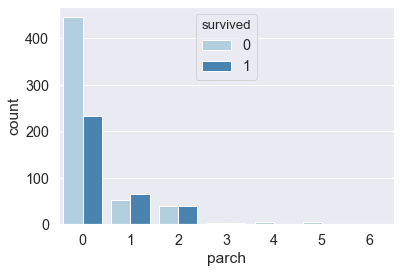

In [22]:
sns.countplot(x='parch', data=titanic1, hue='survived',palette='Blues')

# STANDARDISATION AND DATA SPLIT

In [23]:
X=titanic1.drop('survived',axis=1)
y=titanic1['survived']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=0)
X_train.shape,X_test.shape

((623, 8), (268, 8))

# MODELS

In [26]:
# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(solver='lbfgs')
LogReg.fit(X_train,y_train)
y_predict=LogReg.predict(X_test)
LogReg_score=accuracy_score(y_test,y_predict)*100
LogReg_score

79.47761194029852

In [28]:
# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
DeTree= DecisionTreeClassifier(min_samples_leaf=12,max_depth=7)
DeTree.fit(X_train,y_train)
y_predict=DeTree.predict(X_test)
DeTree_score=accuracy_score(y_test,y_predict)*100
DeTree_score

81.71641791044776

In [30]:
# Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier
Forest= RandomForestClassifier(n_estimators=20,random_state=115)
Forest.fit(X_train,y_train)
y_predict=Forest.predict(X_test)
Forest_score=accuracy_score(y_test,y_predict)*100
Forest_score

77.23880597014924

In [32]:
# KNN Algorithm

Text(0, 0.5, 'Error Rate')

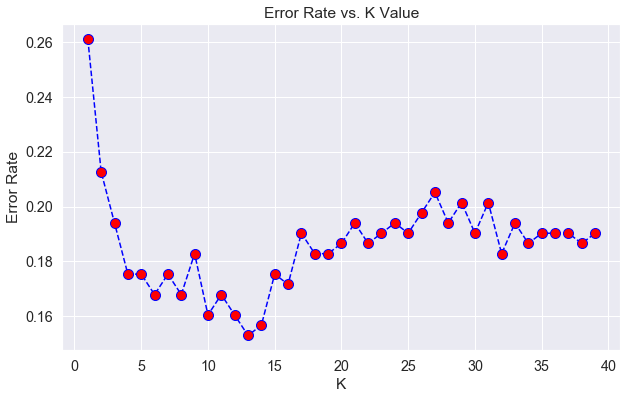

In [33]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
KNN = KNeighborsClassifier(n_neighbors=13,p=3)
KNN.fit(X_train,y_train)
y_predict = KNN.predict(X_test)
KNN_score=accuracy_score(y_test,y_predict)*100
KNN_score

85.07462686567165

In [35]:
# SVM Algorithm 

In [36]:
from sklearn.svm import SVC
Svc= SVC(kernel='rbf',gamma='auto')
Svc.fit(X_train,y_train)
y_predict=Svc.predict(X_test)
Svc_score=accuracy_score(y_test,y_predict)*100
Svc_score

83.5820895522388

In [37]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forests', 
              'KNN', 'SVM'],
    'Score': [LogReg_score,DeTree_score,Forest_score,KNN_score,Svc_score]})
models=models.sort_values(by='Score', ascending=False).reset_index()
model=models.drop(columns=['index'])
model

,Model,Score
0,KNN,85.074627
1,SVM,83.582090
2,Decision Tree,81.716418
3,Logistic Regression,79.477612
4,Random Forests,77.238806
